170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 46s 0us/step


C:\Users\Junaid Ahamed\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.3943 - loss: 1.6722 - val_accuracy: 0.5836 - val_loss: 1.2080
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.6060 - loss: 1.1207 - val_accuracy: 0.6405 - val_loss: 1.0244
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.6659 - loss: 0.9601 - val_accuracy: 0.6677 - val_loss: 0.9568
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7030 - loss: 0.8592 - val_accuracy: 0.6758 - val_loss: 0.9380
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7297 - loss: 0.7883 - val_accuracy: 0.6841 - val_loss: 0.9389
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7534 - loss: 0.7075 - val_accuracy: 0.7023 - val_loss: 0.8729
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7693 - loss: 0.6634 - val_accuracy: 0.6971 - val_loss: 0.8940
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.7894 -

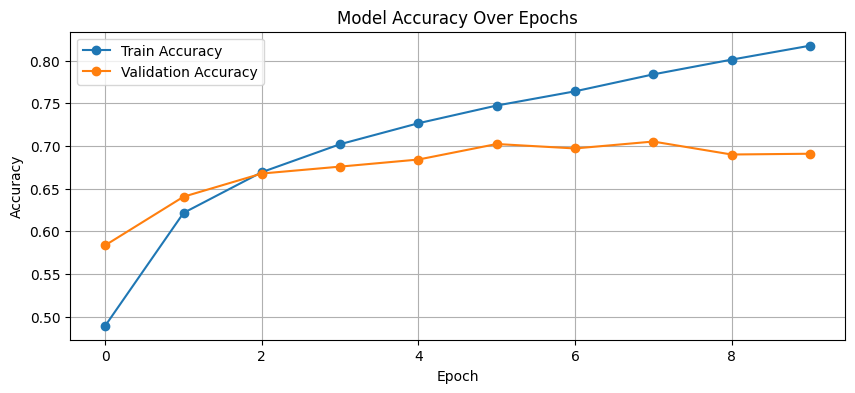

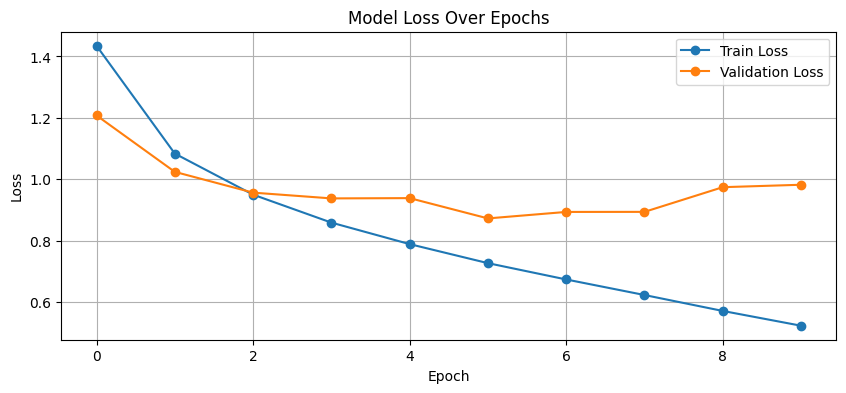

313/313 - 3s - 9ms/step - accuracy: 0.6909 - loss: 0.9824

Test Accuracy: 0.6909
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


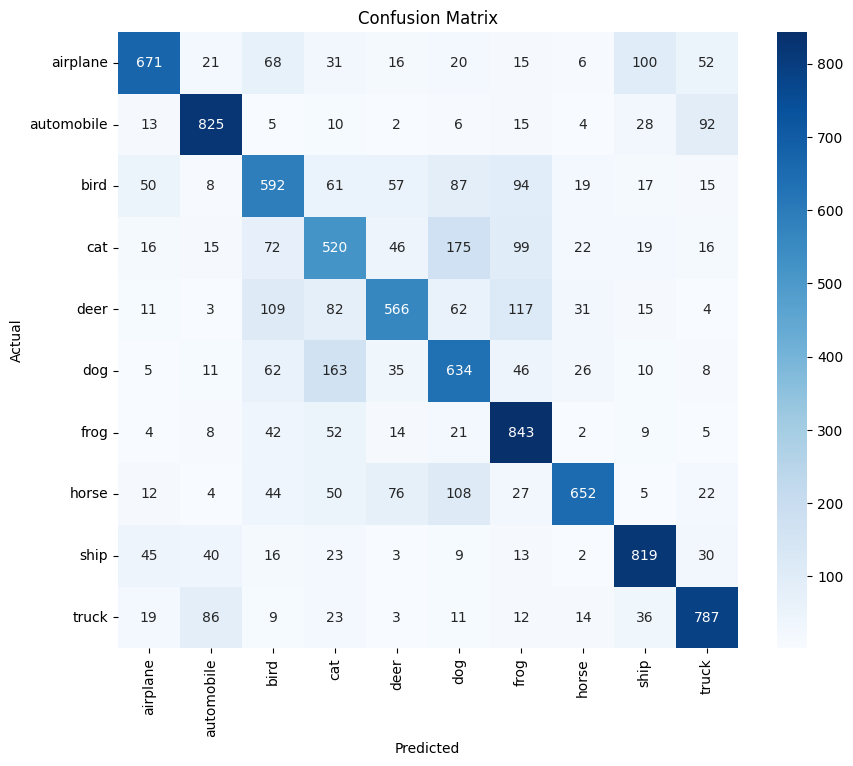


Classification Report:

              precision    recall  f1-score   support

    airplane       0.79      0.67      0.73      1000
  automobile       0.81      0.82      0.82      1000
        bird       0.58      0.59      0.59      1000
         cat       0.51      0.52      0.52      1000
        deer       0.69      0.57      0.62      1000
         dog       0.56      0.63      0.59      1000
        frog       0.66      0.84      0.74      1000
       horse       0.84      0.65      0.73      1000
        ship       0.77      0.82      0.80      1000
       truck       0.76      0.79      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



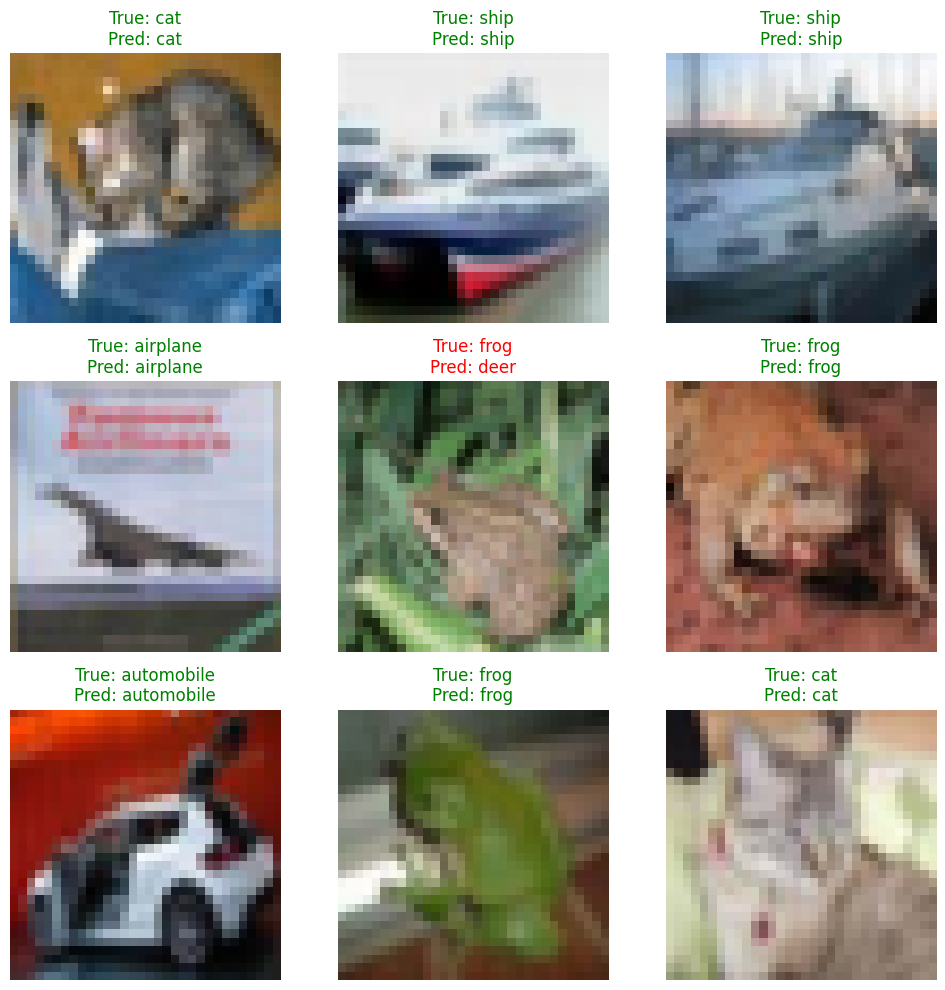

In [2]:
# 1. Import Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 2. Load and Preprocess Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
y_train = y_train.flatten()
y_test = y_test.flatten()

# 3. Define Class Names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 4. Build the CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 output classes
])

# 5. Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 6. Train the Model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# 7. Plot Training and Validation Accuracy
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 8. Plot Training and Validation Loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 9. Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# 10. Predict and Plot Confusion Matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 11. Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

# 12. Visualize Some Predictions
def plot_predictions(images, labels, predictions, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        true_label = class_names[labels[i]]
        predicted_label = class_names[predictions[i]]
        color = 'green' if predicted_label == true_label else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_predictions(x_test[:9], y_test[:9], y_pred[:9], class_names)
